In [156]:
import mne
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.naive_bayes import ComplementNB
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mne.decoding import CSP
from scipy.signal import butter, filtfilt
import pandas as pd
from scipy.fft import fft
import pywt



In [157]:
#Reading Data
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8],on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'archive (3)/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))
  print(groups)

Extracting EDF parameters from d:\FinalVersion\archive (3)\A01T.gdf...
GDF file detected


Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
Extracting EDF parameters from d:\FinalVersion\archive (3)\A02T.gdf...
GDF file detected

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

d:\anaconda\envs\HCI\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [158]:
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)
print(features.shape,labels.shape,groups.shape)


(1296, 22, 176) (1296,) (1296,)


#Reading Data

In [159]:
print("number of null values in features",np.isnan(features).sum())

unique, counts = np.unique(labels, return_counts=True)
print("unique values in label are",unique, "unique counts in label are",counts)

unique2, counts2 = np.unique(groups, return_counts=True)
print("unique values in groups are",unique2, "unique counts in groups are",counts2)

number of null values in features 0
unique values in label are [7 8] unique counts in label are [648 648]
unique values in groups are [1 2 3 4 5 6 7 8 9] unique counts in groups are [144 144 144 144 144 144 144 144 144]


#Preprocessing & Filters

In [160]:
def apply_car(signal):
    avg = np.mean(signal, axis=0)
    return signal - avg

In [161]:
def apply_z_score_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

In [162]:
#order:6 Higher order means a sharper transition from passband to stopband
#filtfilt is to preserve the original shape of the signal while removing unwanted frequencies
def apply_butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=-1)
    print("Applied bandpass filter with interval:", (lowcut, highcut))
    return filtered_data

In [163]:
#Initialization Steps
# Set bandpass filter parameters
lowcut = 4
highcut = 40
interval_step = 2

# Initialize lists to store CSP transformed features
csp_transformed_features = []

# Choose one group (subject) from the dataset
group_idx = 1

# Extract features and labels for the selected group
group_features = features[groups == group_idx]
group_labels = labels[groups == group_idx]


In [164]:
#Calling Functions
group_features_car = apply_car(group_features)
for lowcut in range(4, highcut, interval_step):
    highcut = lowcut + interval_step
    
    # Apply bandpass filter
    filtered_features = apply_butter_bandpass_filter(group_features_car, lowcut, highcut, fs=250)

# Apply z-score normalization
    normalized_features = apply_z_score_normalization(filtered_features)
    #Apply Filter Bank CSP 
    csp = CSP(n_components=2)
    csp.fit(normalized_features, group_labels)
        
    # Transform features using CSP
    transformed_features = csp.transform(normalized_features)
    print("Shape of transformed features after CSP:", transformed_features.shape)

    # Append transformed features to the list
    csp_transformed_features.append(transformed_features)
reshaped_features = filtered_features.reshape((144, -1))
print("shape of features before csp",reshaped_features.shape)


Applied bandpass filter with interval: (4, 6)
Computing rank from data with rank=None
    Using tolerance 2.3 (2.2e-16 eps * 22 dim * 4.8e+14  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=7 covariance using EMPIRICAL
Done.
Estimating class=8 covariance using EMPIRICAL
Done.
Shape of transformed features after CSP: (144, 2)
Applied bandpass filter with interval: (6, 8)
Computing rank from data with rank=None
    Using tolerance 2.3 (2.2e-16 eps * 22 dim * 4.8e+14  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=7 covariance using EMPIRICAL
Done.
Estimating class=8 covariance using EMPIRICAL
Done.
Shape of transformed features after CSP: (144, 2)
Applied bandpass filter with interval: (8, 10)
Computing rank from data with rank=None
    Using tolerance

In [165]:

# Concatenate transformed features from all frequency intervals
csp_transformed_features = np.concatenate(csp_transformed_features, axis=-1)

# Check the shape of transformed features
print("Shape of CSP transformed features for group", group_idx, ":", csp_transformed_features.shape)


Shape of CSP transformed features for group 1 : (144, 36)


In [166]:
# Convert the transformed features and labels into a DataFrame
df = pd.DataFrame(csp_transformed_features, columns=[f'CSP_{i}' for i in range(csp_transformed_features.shape[1])])
df['Label'] = group_labels

# Check the first few rows of the DataFrame
print(df.head())

      CSP_0     CSP_1     CSP_2     CSP_3     CSP_4     CSP_5     CSP_6  \
0 -0.674734 -1.939687 -1.428578 -0.645492  0.151698 -0.203129 -1.075594   
1 -1.875314 -4.322319 -0.708454 -3.916305 -0.883848 -1.420377 -2.031703   
2 -1.264073 -1.105425 -3.035045 -0.313497 -1.655343 -2.624147 -1.044732   
3 -1.538668 -1.220938 -0.634744 -0.575871 -0.242104 -1.692644 -2.013543   
4 -0.310897 -3.390038 -0.148842 -1.034134  0.269527  0.285723 -1.004211   

      CSP_7     CSP_8     CSP_9  ...    CSP_27    CSP_28    CSP_29    CSP_30  \
0  0.569794 -0.435490  1.392108  ... -0.634712 -2.042686 -0.934651 -2.149919   
1 -2.300196 -3.975581 -1.444272  ... -4.288918 -1.525107 -1.096899 -0.735006   
2 -1.086803 -3.146605 -3.385616  ... -3.793977 -0.990238 -2.707363 -1.764081   
3  0.625668  0.341801 -1.059085  ... -0.349228 -0.227790 -4.095554 -0.606132   
4 -0.683948 -1.438593 -0.295923  ... -1.594898 -0.612427 -0.945573 -0.194992   

     CSP_31    CSP_32    CSP_33    CSP_34    CSP_35  Label  
0 -1.23

In [167]:
# Print the type of the 'Label' column
print("Type of column 'Label':", df['Label'].dtype)
df['Label'] = df['Label'].replace({7: 0, 8: 1})
df.head()

Type of column 'Label': int32


,CSP_0,CSP_1,CSP_2,CSP_3,CSP_4,CSP_5,CSP_6,CSP_7,CSP_8,CSP_9,...,CSP_27,CSP_28,CSP_29,CSP_30,CSP_31,CSP_32,CSP_33,CSP_34,CSP_35,Label
0,-0.674734,-1.939687,-1.428578,-0.645492,0.151698,-0.203129,-1.075594,0.569794,-0.435490,1.392108,...,-0.634712,-2.042686,-0.934651,-2.149919,-1.232232,-0.491958,-0.433449,-4.159868,-1.655699,1
1,-1.875314,-4.322319,-0.708454,-3.916305,-0.883848,-1.420377,-2.031703,-2.300196,-3.975581,-1.444272,...,-4.288918,-1.525107,-1.096899,-0.735006,-0.356785,-0.850491,-3.084399,-3.904947,-1.736142,0
2,-1.264073,-1.105425,-3.035045,-0.313497,-1.655343,-2.624147,-1.044732,-1.086803,-3.146605,-3.385616,...,-3.793977,-0.990238,-2.707363,-1.764081,-0.203134,-0.543421,-1.569355,-0.980071,-1.594230,0
3,-1.538668,-1.220938,-0.634744,-0.575871,-0.242104,-1.692644,-2.013543,0.625668,0.341801,-1.059085,...,-0.349228,-0.227790,-4.095554,-0.606132,-2.228308,-4.142109,-2.500242,1.158422,0.995679,1
4,-0.310897,-3.390038,-0.148842,-1.034134,0.269527,0.285723,-1.004211,-0.683948,-1.438593,-0.295923,...,-1.594898,-0.612427,-0.945573,-0.194992,-2.439681,-3.506938,0.599167,0.049517,-1.742260,1


In [168]:
print(df.isnull().sum())
print(df.duplicated())

CSP_0     0
CSP_1     0
CSP_2     0
CSP_3     0
CSP_4     0
CSP_5     0
CSP_6     0
CSP_7     0
CSP_8     0
CSP_9     0
CSP_10    0
CSP_11    0
CSP_12    0
CSP_13    0
CSP_14    0
CSP_15    0
CSP_16    0
CSP_17    0
CSP_18    0
CSP_19    0
CSP_20    0
CSP_21    0
CSP_22    0
CSP_23    0
CSP_24    0
CSP_25    0
CSP_26    0
CSP_27    0
CSP_28    0
CSP_29    0
CSP_30    0
CSP_31    0
CSP_32    0
CSP_33    0
CSP_34    0
CSP_35    0
Label     0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Length: 144, dtype: bool


In [169]:
X = df.drop(columns=['Label'])  # Extract all columns except 'Label'
y = df['Label']

In [170]:
# Check the shapes of X and y
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

Shape of features (X): (144, 36)
Shape of labels (y): (144,)


In [171]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state =42)
X_train.shape,X_test.shape ,y_train.shape,y_test.shape

((115, 36), (29, 36), (115,), (29,))

In [172]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#Classification

In [173]:
# Set up the hyperparameter grid
#c controls regularization strength
#solver : optimize the loss function
param_grid = {
    'C':[0.001,0.01,0.1]

}

# Create an instance of Logistic Regression classifier with 'saga' solver
logreg = LogisticRegression(solver='saga')

# Create a grid search object
grid_search_lr = GridSearchCV(logreg, param_grid, cv=5)

# Fit the grid search object to the data
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best parameters for logistic regression:", best_params_lr)
# Train a logistic regression model with the best hyperparameters
lr_model = LogisticRegression(**grid_search_lr.best_params_)
lr_model.fit(X_train, y_train)

# Predict using the best model on train data
y_train_pred_lr = lr_model.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, y_train_pred_lr)

# Predict using the best model
y_pred_best = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_best)

print("Training Accuracy of logistic regression :", lr_train_accuracy * 100, "%")

print("Testing Accuracy of logistic regression  ", lr_accuracy * 100, "%")
joblib.dump(lr_model, 'logisticregression_best_model.pkl')

Best parameters for logistic regression: {'C': 0.01}
Training Accuracy of logistic regression : 98.26086956521739 %
Testing Accuracy of logistic regression   100.0 %


d:\anaconda\envs\HCI\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda\envs\HCI\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda\envs\HCI\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda\envs\HCI\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda\envs\HCI\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda\envs\HCI\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

['logisticregression_best_model.pkl']

In [174]:
# Set up the hyperparameter grid
# kernel is used to transform the input data into a higher-dimensional space.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create an instance of SVM classifier
svm = SVC()

# Create a grid search object
grid_search_svm = GridSearchCV(svm, param_grid, cv=10)

# Fit the grid search object to the data
grid_search_svm.fit(X_train, y_train)
best_params = grid_search_svm.best_params_
print("Best parameters:", best_params)

# Train an SVM classifier with the best hyperparameters
svm_model = SVC(**grid_search_svm.best_params_)
svm_model.fit(X_train, y_train)

# Predict using the best model on test data
y_pred_best = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_best)

# Predict using the best model on train data
y_train_pred_best = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, y_train_pred_best)

print("Training Accuracy of SVM :", svm_train_accuracy * 100, "%")

# Print the accuracy of the best model on test data
print("Testing Accuracy of SVM :", svm_accuracy * 100, "%")

# Print the accuracy of the best model on train data

# Save the best model
joblib.dump(svm_model, 'svm_best_model.pkl')

Best parameters: {'C': 0.1, 'kernel': 'poly'}
Training Accuracy of SVM : 100.0 %
Testing Accuracy of SVM : 96.55172413793103 %


['svm_best_model.pkl']

In [175]:
# Set up the hyperparameter grid
#Laplace smoothing is a technique used to handle the problem of zero probabilities for certain features in the training data
param_grid = {
    'alpha': [0.1, 1, 10, 100]  # Alpha parameter for Laplace smoothing
}

# Create an instance of Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Create a grid search object
grid_search_mnb = GridSearchCV(nb, param_grid, cv=5)

# Fit the grid search object to the data
grid_search_mnb.fit(X_train_sc, y_train)
best_params_mnb = grid_search_mnb.best_params_
print("Best parameters:", best_params_mnb)

# Train a Multinomial Naive Bayes classifier with the best hyperparameters
mnb_model = MultinomialNB(**grid_search_mnb.best_params_)
mnb_model.fit(X_train_sc, y_train)


# Predict using the best model on train data
y_train_pred_mnb = mnb_model.predict(X_train_sc)
mnb_train_accuracy = accuracy_score(y_train, y_train_pred_mnb)

# Predict using the best model
y_pred_best = mnb_model.predict(X_test_sc)
mnb_accuracy = accuracy_score(y_test, y_pred_best)

print("Training Accuracy of Multinomial Naive Bayes  ", mnb_train_accuracy * 100, "%")
# Print the accuracy of the best model
print("Testing Accuracy of Multinomial Naive Bayes : ", mnb_accuracy * 100, "%")
joblib.dump(mnb_model, 'mnb_best_model.pkl')

Best parameters: {'alpha': 0.1}
Training Accuracy of Multinomial Naive Bayes   99.1304347826087 %
Testing Accuracy of Multinomial Naive Bayes :  100.0 %


['mnb_best_model.pkl']

In [176]:
param = {
    'max_depth': [5, 10, 20, 50, 100],
    'n_estimators': [2, 10, 25, 50, 100],
     'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
first_rf = RandomForestClassifier()

# Perform GridSearchCV
clf = GridSearchCV(first_rf, param, cv=10)
clf.fit(X_train, y_train)

# Get the best parameters
best_params = clf.best_params_
print("Best parameters:", best_params)

# Create a new RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Train the model with the entire training data
best_rf.fit(X_train, y_train)

# Make predictions
predictions = best_rf.predict(X_test)

y_train_pred_rf = best_rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, predictions)
print("Training Accuracy for Random forest:",rf_train_accuracy)
print("Testing Accuracy for random forest:", rf_accuracy)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy for Random forest: 1.0
Testing Accuracy for random forest: 0.9310344827586207


In [177]:
from xgboost import XGBClassifier


param={
'max_depth':[5,10,20,50,100],
'learning_rate':[0.001,0.01,0.03,0.05,0.5,1],
'subsample':[0.8,0.5,0.2],
'n_estimators':[2,10,25,50,100]
}

first_xgb = xgb.XGBClassifier()
grid_search_xgb =GridSearchCV(first_xgb,param, cv=5,verbose=2)
grid_search_xgb.fit(X_train,y_train)
best_params = grid_search_xgb.best_params_
print("Best parameters:", best_params)

# Create a new XGBClassifier with the best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

y_train_pred_xgb = best_xgb.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
# Train the model with the entire training data

# Make predictions
predictions = best_xgb.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, predictions)
print("Training Accuracy for xgb:", xgb_train_accuracy)
print("Testing Accuracy for xgb:", xgb_accuracy)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=2, subsample=0.5; total time=   0.0s
[CV] E

Text(0.5, 0, 'Performance Accuracy in Percentage')

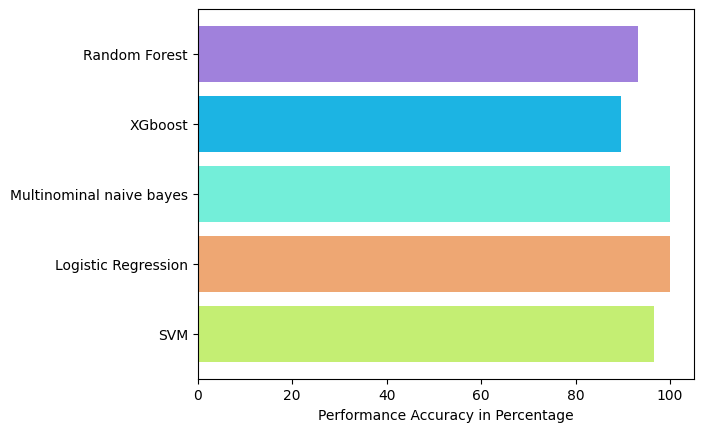

In [178]:

X_bar = ['SVM','Logistic Regression','Multinominal naive bayes','XGboost','Random Forest']
Y_bar= [svm_accuracy*100,lr_accuracy*100,mnb_accuracy*100,xgb_accuracy*100,rf_accuracy*100]
import matplotlib.pyplot as plt
plt.barh(X_bar, Y_bar, align='center', color=('#C4EE73','#EEA773', '#73EED9', '#1CB4E3', '#A081DC', '#BE20E7', '#F54B48','#DC93DD'))
plt.xlabel("Performance Accuracy in Percentage")


In [179]:
loaded_model = joblib.load('svm_best_model.pkl')
loaded_model2= joblib.load('logisticregression_best_model.pkl')
loaded_model3=joblib.load('mnb_best_model.pkl')

In [180]:
x_test_data = X_test_sc[-8:, :]

# Define the file name
file_name = "Gui.txt"

# Open the file in write mode
with open(file_name, 'w') as file:
    # Write each element of x_test_data to the file
    for item in x_test_data:
        file.write("%s\n" % item)

print("Data saved to", file_name)

Data saved to Gui.txt


In [181]:
import numpy as np

# Define the file name
file_name = "Gui.txt"

# Read the data from the file
with open(file_name, 'r') as file:
    # Read the lines from the file
    lines = file.readlines()

# Process the lines to extract the data
data = []
for i in range(0, len(lines), 6):
    row = []
    for line in lines[i:i+6]:
        # Strip the square brackets and split the string by whitespace to get individual values
        values = line.strip()[1:-1].split()
        # Convert each value to a float and append to row
        row.extend([float(value) for value in values])
    # Append the row to the data
    data.append(row)

# Convert the data to a numpy array
data = np.array(data)

# Print the shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (8, 36)


In [182]:

predictions = loaded_model3.predict(data)
y_test_data=y_test[-8:]
print("Predictions are:", predictions)
print('ytestdata',y_test_data)


Predictions are: [0 1 0 1 1 1 1 1]
ytestdata 119    0
110    1
113    0
55     1
45     1
9      1
4      1
26     1
Name: Label, dtype: int32


In [183]:
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk, Image

# Create a Tkinter window
root = Tk()

# Set the window title
root.title("Image Viewer")

def resize_image(image_path, new_width, new_height):
    image = Image.open(image_path)
    resized_image = image.resize((new_width, new_height))
    return ImageTk.PhotoImage(resized_image)
# Add some images to a list
List_images = [
    resize_image("D:\\FinalVersion\\images\\photo0.jpg", 1500, 750),
    resize_image("D:\\FinalVersion\\images\\photo1.jpg", 1500, 750),
    resize_image("D:\\FinalVersion\\images\\photo2.jpg", 1500, 750),
    resize_image("D:\\FinalVersion\\images\\photo3.jpg", 1500, 780),
    resize_image("D:\\FinalVersion\\images\\photo4.jpg", 1500, 780),
    resize_image("D:\\FinalVersion\\images\\photo5.jpg", 1500, 780),
    resize_image("D:\\FinalVersion\\images\\photo6.jpg", 1500, 780),
    resize_image("D:\\FinalVersion\\images\\photo7.jpg", 1500, 780),
    resize_image("D:\\FinalVersion\\images\\photo8.jpg", 1500, 780)
]


# Initialize label with the first image
label = Label(image=List_images[0])
label.grid(row=1, column=0, columnspan=3)

# Track the current image index
current_image_index = 0
current_image=0
# Function to make prediction and draw arrow based on prediction
def make_prediction(event):
    global current_image
    
    # Get the prediction for the current image
    if current_image< len(predictions):

        prediction = predictions[current_image]
        if prediction == 0:
                back()  
        elif prediction == 1:
                forward()  
    if current_image == len(predictions):
        root.destroy()

    current_image+=1

# Function to move forward
#dynamically updates the image displayed by the Tkinter Label widget to the image located at the current index 
def forward():
    global current_image_index
    current_image_index += 1

    if current_image_index < len(List_images)- 1:
        label.config(image=List_images[current_image_index])
        
    

# Function to move backward
def back():
    global current_image_index
    current_image_index -= 1   
    if current_image_index >= 0:
        label.config(image=List_images[current_image_index])
    
    else:
        messagebox.showinfo("Information", "This is the first image. There are no images before it.")
        current_image_index = 0
        
       

root.bind('<Button-1>', make_prediction)

# Run the main loop
root.mainloop()
